# Digitalne navike i očekivanja potrošača-anketa

In [208]:
import pyodbc
import pandas as pd
import csv
from bokeh.io import push_notebook, show, output_notebook
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
import matplotlib.animation as animation
from matplotlib.figure import Figure
from sklearn.cluster import KMeans
import matplotlib.pylab as pylab
from ipywidgets import interact
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from sklearn  import datasets
from random import randint
import matplotlib as mpl
import seaborn as sns

import numpy as np
import matplotlib
import warnings
import string
import numpy

import os




In [209]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-8NPN7QSF\SQLEXPRESS01;'
                      'Database=Digitalne navike;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

anketa = pd.read_sql_query('select * from dbo.Anketa_raw',conn)
print(anketa)
print(type(anketa))


               Vremenska_oznaka Dobna_skupina Spol  \
0     2020/10/31 9:41:33 AM CET         41-45    Ž   
1     2020/10/31 9:49:11 AM CET         41-45    M   
2    2020/10/31 10:56:49 AM CET         36-40    Ž   
3    2020/10/31 11:00:40 AM CET         36-40    M   
4    2020/10/31 11:02:05 AM CET         36-40    Ž   
..                          ...           ...  ...   
155   2020/11/09 8:56:15 AM CET         41-45    M   
156   2020/11/09 9:16:50 PM CET         41-45    Ž   
157   2020/11/10 7:20:21 PM CET         36-40    M   
158   2020/11/11 7:05:54 AM CET         36-40    M   
159   2020/11/11 8:50:31 PM CET         31-35    Ž   

    Koristite_li_Internet_Mobilno_bankarstvo  \
0                                         Da   
1                                         Da   
2                                         Da   
3                                         Da   
4                                         Da   
..                                       ...   
155            

In [210]:
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np


In [211]:
print(anketa.columns)

Index(['Vremenska_oznaka', 'Dobna_skupina', 'Spol',
       'Koristite_li_Internet_Mobilno_bankarstvo',
       'U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo',
       'Da_li_ste_zadovoljni_Internet_Mobilnim_bankarstvom_koje_koristite',
       'Osjećate_li_se_sigurno_pri_korištenju_Internet_Mobilnog_bankarstva_FinTech_aplikacija'],
      dtype='object')


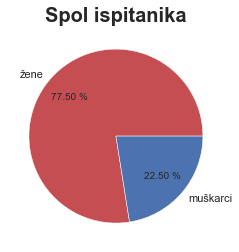

<Figure size 1080x360 with 0 Axes>

In [212]:
žene = anketa.loc[anketa['Spol'] == 'Ž'].count()[0]
muškarci = anketa.loc[anketa ['Spol'] == 'M'].count()[0]

labels = ['žene', 'muškarci']
colors = ['r','b']
plt.pie([žene, muškarci], labels=labels, colors=colors, autopct='%.2f %%', pctdistance=0.7)



plt.title('Spol ispitanika', fontdict={'fontweight':'bold', 'fontsize':20})

plt.figure(figsize=(15,5))

plt.show()



In [213]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [214]:
print(anketa.Dobna_skupina)

0      41-45
1      41-45
2      36-40
3      36-40
4      36-40
       ...  
155    41-45
156    41-45
157    36-40
158    36-40
159    31-35
Name: Dobna_skupina, Length: 160, dtype: object


In [215]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

<Figure size 432x288 with 0 Axes>

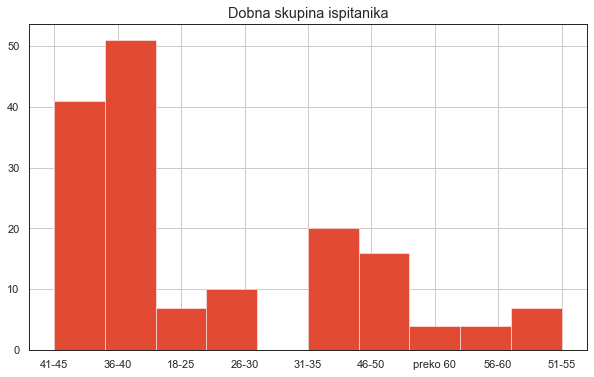

<Figure size 432x288 with 0 Axes>

In [224]:
anketa['Dobna_skupina'].hist(figsize=(10,6))
plt.title('Dobna skupina ispitanika')
plt.figure()

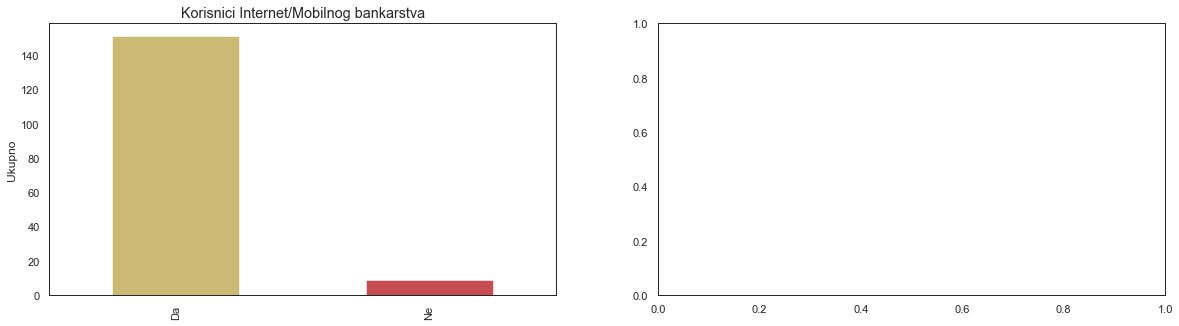

In [217]:
f,ax=plt.subplots(1,2,figsize=(20,5))
anketa['Koristite_li_Internet_Mobilno_bankarstvo'].value_counts().plot.bar(color=['y','r'],ax=ax[0])
ax[0].set_title('Korisnici Internet/Mobilnog bankarstva')
ax[0].set_ylabel('Ukupno')
plt.show()

In [218]:
print(anketa.U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo)

0             PBZ;Addiko Bank
1                         PBZ
2                        ZABA
3            Neka druga banka
4                        ZABA
                ...          
155    Erste Bank;Addiko Bank
156                       PBZ
157               Addiko Bank
158               Addiko Bank
159                       PBZ
Name: U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo, Length: 160, dtype: object


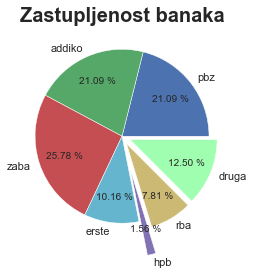

<Figure size 2160x360 with 0 Axes>

In [219]:
pbz = anketa.loc[anketa['U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo'] == 'PBZ'].count()[0]
addiko = anketa.loc[anketa ['U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo'] == 'Addiko Bank'].count()[0]
zaba = anketa.loc[anketa['U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo'] == 'ZABA'].count()[0]
erste = anketa.loc[anketa ['U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo'] == 'Erste Bank'].count()[0]
hpb = anketa.loc[anketa['U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo'] == 'HPB'].count()[0]
rba = anketa.loc[anketa ['U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo'] == 'RBA'].count()[0]
druga = anketa.loc[anketa['U_kojoj_banci_koristite_Internet_Mobilno_Bankarstvo'] == 'Neka druga banka'].count()[0]


labels = ['pbz','addiko','zaba','erste','hpb','rba','druga']
colors = ['b','g','r','c','m', 'y', '#9ffeb0']
explode=(0,0,0,0,.4,.1,.1)
plt.pie([pbz,addiko,zaba,erste,hpb,rba,druga], labels=labels, colors=colors, autopct='%.2f %%', pctdistance=0.7, explode=explode)



plt.title('Zastupljenost banaka', fontdict={'fontweight':'bold', 'fontsize':20})

plt.figure(figsize=(30,5))

plt.show()


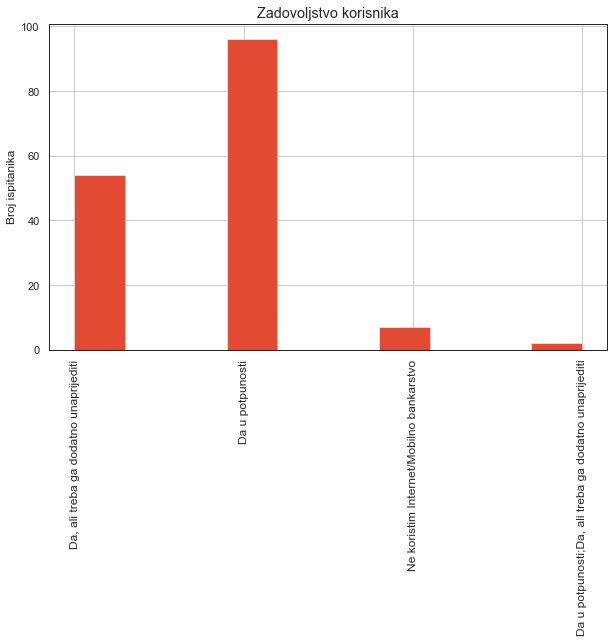

In [234]:
anketa['Da_li_ste_zadovoljni_Internet_Mobilnim_bankarstvom_koje_koristite'].hist(figsize=(10,6))

plt.xticks(rotation='vertical', size=12)
plt.ylabel('Broj ispitanika')
plt.title('Zadovoljstvo korisnika')

plt.show()


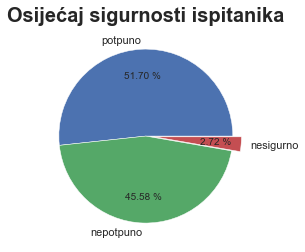

<Figure size 2160x360 with 0 Axes>

In [220]:
potpuno = anketa.loc[anketa['Osjećate_li_se_sigurno_pri_korištenju_Internet_Mobilnog_bankarstva_FinTech_aplikacija'] == 'Da, u potpunosti sigurno'].count()[0]

nepotpuno = anketa.loc[anketa ['Osjećate_li_se_sigurno_pri_korištenju_Internet_Mobilnog_bankarstva_FinTech_aplikacija'] == 'Da, ali samo koristeći Internet/Mobilno bankarstvo'].count()[0]

nesigurno = anketa.loc[anketa['Osjećate_li_se_sigurno_pri_korištenju_Internet_Mobilnog_bankarstva_FinTech_aplikacija'] == 'Ne osjećam se sigurno'].count()[0]


labels = ['potpuno','nepotpuno','nesigurno']
colors = ['b','g','r',]
explode=(0,0,.1)
plt.pie([potpuno,nepotpuno,nesigurno], labels=labels, colors=colors, autopct='%.2f %%', pctdistance=0.7, explode=explode)



plt.title('Osijećaj sigurnosti ispitanika', fontdict={'fontweight':'bold', 'fontsize':20})

plt.figure(figsize=(30,5))

plt.show()


